# Weather Modelling Using Prophet

This example uses the Prophet model to forecast mean temperature using monthly data for Dublin Airport, Ireland. The time series ranges from November 1941 - January 2018.

#### Attributions

The below code uses the [Prophet](https://github.com/facebook/prophet) library, which has been made available by Facebook under the MIT License. Modifications have been made where appropriate for conducting analysis on the dataset specific to this example.

The copyright and permission notices are included below in accordance with the terms of the license:

Copyright (c) Facebook, Inc. and its affiliates.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

The weather data used in this example is sourced from the [Met Eireann](https://www.met.ie/climate/available-data/historical-data) website.

The below work and findings are not endorsed by the original authors in any way.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dataset = pd.read_csv('mly532.csv')
dataset

date  meant  maxtp  mintp  mnmax  mnmin  rain   gmin  wdsp maxgt  \
0    1941-11-01    6.9   14.0   -3.1    9.9    3.9  67.2   -5.7  12.0         
1    1941-12-01    6.5   12.7   -3.6    9.1    3.9  41.7   -7.6  12.5         
2    1942-01-01    4.3   11.9   -3.1    6.9    1.7  91.9   -9.5  13.1         
3    1942-02-01    2.9   11.6   -4.3    5.8    0.0  25.8  -10.7   9.0         
4    1942-03-01    6.3   16.2   -6.1    9.4    3.2  76.4   -8.3  10.7         
..          ...    ...    ...    ...    ...    ...   ...    ...   ...   ...   
910  2017-09-01   12.4   18.9    4.5   16.5    8.3  82.3    0.4  10.9    43   
911  2017-10-01   11.2   19.5    0.8   14.8    7.7  47.8   -3.1  12.2    56   
912  2017-11-01    6.5   14.1   -0.5    9.6    3.3  81.5   -2.9  10.8    36   
913  2017-12-01    5.3   13.6   -4.8    8.1    2.5  63.1   -6.7  12.4    49   
914  2018-01-01    5.3   13.1   -3.2    8.4    2.2  93.1   -9.8  14.8    54   

       sun  
0     56.1  
1     46.1  
2     72.8  
3     51.4  
4     73.9  
..     ...  
910  128.7  
911   73.9  
912   87.0  
913   59.1  
914   73.3  

[915 rows x 11 columns]

In [2]:
meant=dataset['meant']
meant=np.array(meant)

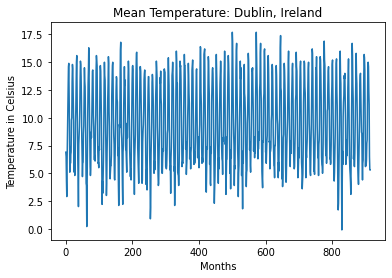

In [3]:
plt.plot(meant)
plt.title("Mean Temperature: Dublin, Ireland")
plt.xlabel("Months")
plt.ylabel("Temperature in Celsius")
plt.show()

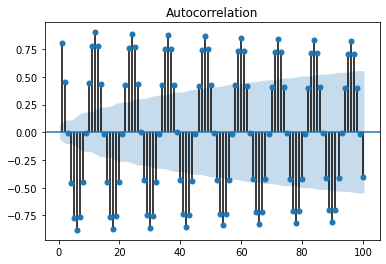

In [4]:
plot_acf(meant, lags=100, zero=False);

In [5]:
from fbprophet import Prophet
Prophet()

In [6]:
train_df=dataset[:732]
train_df

date  meant  maxtp  mintp  mnmax  mnmin   rain   gmin  wdsp maxgt  \
0    1941-11-01    6.9   14.0   -3.1    9.9    3.9   67.2   -5.7  12.0         
1    1941-12-01    6.5   12.7   -3.6    9.1    3.9   41.7   -7.6  12.5         
2    1942-01-01    4.3   11.9   -3.1    6.9    1.7   91.9   -9.5  13.1         
3    1942-02-01    2.9   11.6   -4.3    5.8    0.0   25.8  -10.7   9.0         
4    1942-03-01    6.3   16.2   -6.1    9.4    3.2   76.4   -8.3  10.7         
..          ...    ...    ...    ...    ...    ...    ...    ...   ...   ...   
727  2002-06-01   13.1   21.6    5.5   17.2    9.0   81.2    1.5  10.8    45   
728  2002-07-01   14.4   23.7    6.7   18.3   10.4   68.9    2.1   8.3    33   
729  2002-08-01   15.0   21.9    6.2   18.9   11.2   50.8    4.2   7.4    41   
730  2002-09-01   12.5   20.8    3.4   17.1    8.0   22.6   -1.4   7.0    34   
731  2002-10-01    9.5   18.7   -0.1   13.0    5.9  181.2   -6.9  10.0    67   

       sun  
0     56.1  
1     46.1  
2     72.8  
3     51.4  
4     73.9  
..     ...  
727  162.2  
728  106.8  
729  140.2  
730  130.0  
731  100.0  

[732 rows x 11 columns]

In [7]:
test_df=dataset[732:915]
test_df

date  meant  maxtp  mintp  mnmax  mnmin   rain   gmin  wdsp maxgt  \
732  2002-11-01    8.4   15.9    1.3   11.2    5.7  185.8     -4  11.1    51   
733  2002-12-01    6.4   13.4   -2.2    8.2    4.5   97.5   -5.5  11.2    48   
734  2003-01-01    5.1   12.7   -4.4    8.0    2.1   62.6  -10.3  12.8    50   
735  2003-02-01    4.8   12.3   -5.1    7.8    1.7   20.9  -10.7  11.2    42   
736  2003-03-01    6.8   14.6   -2.3   11.6    2.1   27.1   -6.7   9.2    48   
..          ...    ...    ...    ...    ...    ...    ...    ...   ...   ...   
910  2017-09-01   12.4   18.9    4.5   16.5    8.3   82.3    0.4  10.9    43   
911  2017-10-01   11.2   19.5    0.8   14.8    7.7   47.8   -3.1  12.2    56   
912  2017-11-01    6.5   14.1   -0.5    9.6    3.3   81.5   -2.9  10.8    36   
913  2017-12-01    5.3   13.6   -4.8    8.1    2.5   63.1   -6.7  12.4    49   
914  2018-01-01    5.3   13.1   -3.2    8.4    2.2   93.1   -9.8  14.8    54   

       sun  
732   56.7  
733   30.6  
734   75.4  
735  102.5  
736  172.2  
..     ...  
910  128.7  
911   73.9  
912   87.0  
913   59.1  
914   73.3  

[183 rows x 11 columns]

In [8]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = train_df['date']
train_dataset['y']= train_df['meant']
train_dataset.head(10)

ds     y
0  1941-11-01   6.9
1  1941-12-01   6.5
2  1942-01-01   4.3
3  1942-02-01   2.9
4  1942-03-01   6.3
5  1942-04-01   8.4
6  1942-05-01  10.4
7  1942-06-01  13.1
8  1942-07-01  14.6
9  1942-08-01  14.9

In [9]:
from fbprophet.plot import plot_plotly

import plotly.offline as py
py.init_notebook_mode()

In [10]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future= prophet_basic.make_future_dataframe(periods=183, freq='M')
future.tail(15)

ds
900 2016-10-31
901 2016-11-30
902 2016-12-31
903 2017-01-31
904 2017-02-28
905 2017-03-31
906 2017-04-30
907 2017-05-31
908 2017-06-30
909 2017-07-31
910 2017-08-31
911 2017-09-30
912 2017-10-31
913 2017-11-30
914 2017-12-31

In [12]:
forecast=prophet_basic.predict(future)

In [13]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   1941-11-01  9.321978    5.451254    8.396807     9.321978     9.321978   
1   1941-12-01  9.322379    4.073377    7.101840     9.322379     9.322379   
2   1942-01-01  9.322794    3.382750    6.179667     9.322794     9.322794   
3   1942-02-01  9.323208    3.540021    6.337383     9.323208     9.323208   
4   1942-03-01  9.323583    4.819576    7.608121     9.323583     9.323583   
..         ...       ...         ...         ...          ...          ...   
910 2017-08-31  9.578585   11.492009   14.300683     9.555246     9.602922   
911 2017-09-30  9.578299    9.150000   11.947507     9.554648     9.602937   
912 2017-10-31  9.578004    5.970065    8.681978     9.554101     9.602842   
913 2017-11-30  9.577718    4.761348    7.592024     9.553619     9.602880   
914 2017-12-31  9.577422    3.667923    6.605262     9.553173     9.602932   

     additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0         -2.389609             -2.389609             -2.389609 -2.389609   
1         -3.765501             -3.765501             -3.765501 -3.765501   
2         -4.537199             -4.537199             -4.537199 -4.537199   
3         -4.414871             -4.414871             -4.414871 -4.414871   
4         -3.071948             -3.071948             -3.071948 -3.071948   
..              ...                   ...                   ...       ...   
910        3.342474              3.342474              3.342474  3.342474   
911        1.007491              1.007491              1.007491  1.007491   
912       -2.321614             -2.321614             -2.321614 -2.321614   
913       -3.502061             -3.502061             -3.502061 -3.502061   
914       -4.468018             -4.468018             -4.468018 -4.468018   

     yearly_lower  yearly_upper  multiplicative_terms  \
0       -2.389609     -2.389609                   0.0   
1       -3.765501     -3.765501                   0.0   
2       -4.537199     -4.537199                   0.0   
3       -4.414871     -4.414871                   0.0   
4       -3.071948     -3.071948                   0.0   
..            ...           ...                   ...   
910      3.342474      3.342474                   0.0   
911      1.007491      1.007491                   0.0   
912     -2.321614     -2.321614                   0.0   
913     -3.502061     -3.502061                   0.0   
914     -4.468018     -4.468018                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                           0.0                         0.0   6.932369  
1                           0.0                         0.0   5.556878  
2                           0.0                         0.0   4.785594  
3                           0.0                         0.0   4.908338  
4                           0.0                         0.0   6.251635  
..                          ...                         ...        ...  
910                         0.0                         0.0  12.921059  
911                         0.0                         0.0  10.585790  
912                         0.0                         0.0   7.256390  
913                         0.0                         0.0   6.075656  
914                         0.0                         0.0   5.109404  

[915 rows x 16 columns]

In [14]:
yhat=forecast['yhat']
yhat

0       6.932369
1       5.556878
2       4.785594
3       4.908338
4       6.251635
         ...    
910    12.921059
911    10.585790
912     7.256390
913     6.075656
914     5.109404
Name: yhat, Length: 915, dtype: float64

In [15]:
yhat=yhat[732:915]

In [16]:
test=test_df['meant']
test

732     8.4
733     6.4
734     5.1
735     4.8
736     6.8
       ... 
910    12.4
911    11.2
912     6.5
913     5.3
914     5.3
Name: meant, Length: 183, dtype: float64

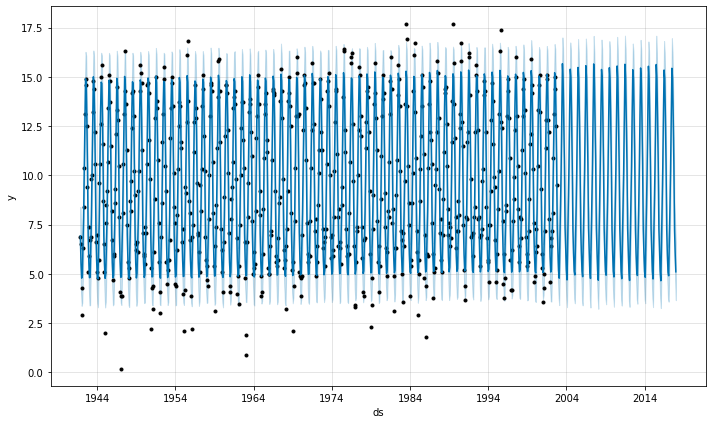

In [17]:
fig1 =prophet_basic.plot(forecast)

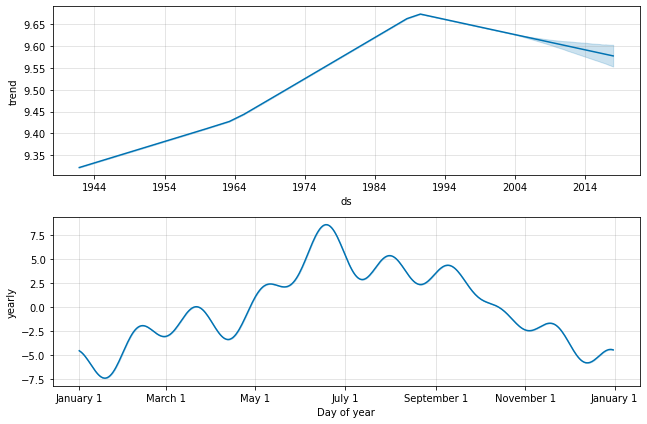

In [18]:
fig1 = prophet_basic.plot_components(forecast)

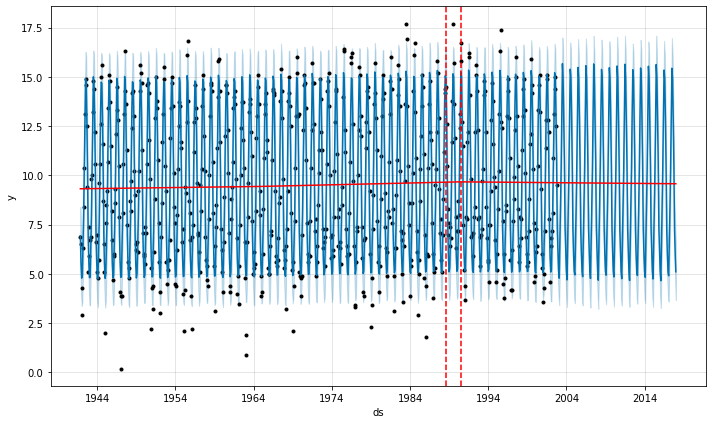

In [19]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [20]:
prophet_basic.changepoints

23    1943-10-01
47    1945-10-01
70    1947-09-01
93    1949-08-01
117   1951-08-01
140   1953-07-01
164   1955-07-01
187   1957-06-01
210   1959-05-01
234   1961-05-01
257   1963-04-01
280   1965-03-01
304   1967-03-01
327   1969-02-01
350   1971-01-01
374   1973-01-01
397   1974-12-01
420   1976-11-01
444   1978-11-01
467   1980-10-01
491   1982-10-01
514   1984-09-01
537   1986-08-01
561   1988-08-01
584   1990-07-01
Name: ds, dtype: datetime64[ns]

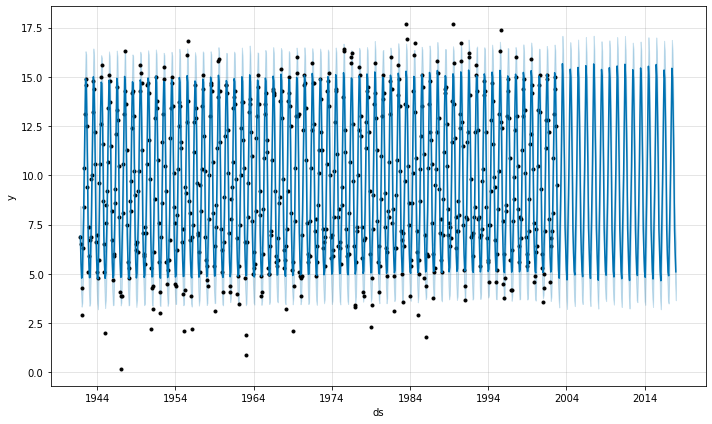

In [21]:
future_data = prophet_basic.make_future_dataframe(periods=183, freq = 'm')
 
forecast_data = prophet_basic.predict(future_data)
prophet_basic.plot(forecast_data);

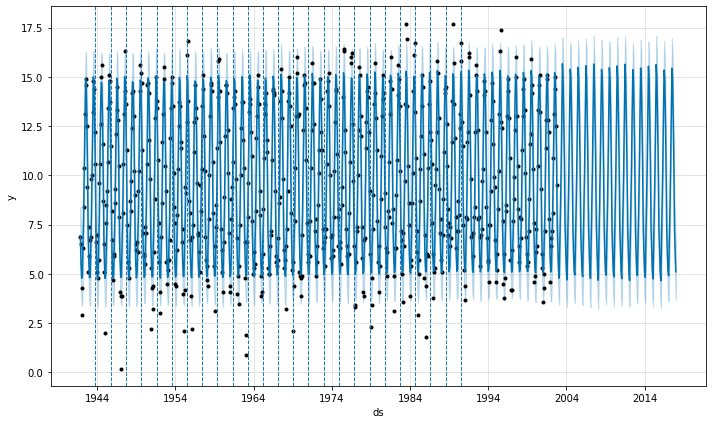

In [22]:
import matplotlib.pyplot as plt

figure = prophet_basic.plot(forecast)
for changepoint in prophet_basic.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [23]:
forecast_data

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   1941-11-01  9.321978    5.330782    8.446802     9.321978     9.321978   
1   1941-12-01  9.322379    4.103982    6.852580     9.322379     9.322379   
2   1942-01-01  9.322794    3.340618    6.247171     9.322794     9.322794   
3   1942-02-01  9.323208    3.539340    6.271624     9.323208     9.323208   
4   1942-03-01  9.323583    4.688574    7.584369     9.323583     9.323583   
..         ...       ...         ...         ...          ...          ...   
910 2017-08-31  9.578585   11.608439   14.402899     9.552942     9.602945   
911 2017-09-30  9.578299    9.169147   12.032254     9.552441     9.602842   
912 2017-10-31  9.578004    5.826210    8.614915     9.551870     9.602735   
913 2017-11-30  9.577718    4.590439    7.420755     9.551452     9.602631   
914 2017-12-31  9.577422    3.663957    6.604706     9.551021     9.602524   

     additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0         -2.389609             -2.389609             -2.389609 -2.389609   
1         -3.765501             -3.765501             -3.765501 -3.765501   
2         -4.537199             -4.537199             -4.537199 -4.537199   
3         -4.414871             -4.414871             -4.414871 -4.414871   
4         -3.071948             -3.071948             -3.071948 -3.071948   
..              ...                   ...                   ...       ...   
910        3.342474              3.342474              3.342474  3.342474   
911        1.007491              1.007491              1.007491  1.007491   
912       -2.321614             -2.321614             -2.321614 -2.321614   
913       -3.502061             -3.502061             -3.502061 -3.502061   
914       -4.468018             -4.468018             -4.468018 -4.468018   

     yearly_lower  yearly_upper  multiplicative_terms  \
0       -2.389609     -2.389609                   0.0   
1       -3.765501     -3.765501                   0.0   
2       -4.537199     -4.537199                   0.0   
3       -4.414871     -4.414871                   0.0   
4       -3.071948     -3.071948                   0.0   
..            ...           ...                   ...   
910      3.342474      3.342474                   0.0   
911      1.007491      1.007491                   0.0   
912     -2.321614     -2.321614                   0.0   
913     -3.502061     -3.502061                   0.0   
914     -4.468018     -4.468018                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                           0.0                         0.0   6.932369  
1                           0.0                         0.0   5.556878  
2                           0.0                         0.0   4.785594  
3                           0.0                         0.0   4.908338  
4                           0.0                         0.0   6.251635  
..                          ...                         ...        ...  
910                         0.0                         0.0  12.921059  
911                         0.0                         0.0  10.585790  
912                         0.0                         0.0   7.256390  
913                         0.0                         0.0   6.075656  
914                         0.0                         0.0   5.109404  

[915 rows x 16 columns]

In [24]:
yhat=forecast_data['yhat']

In [25]:
yhat

0       6.932369
1       5.556878
2       4.785594
3       4.908338
4       6.251635
         ...    
910    12.921059
911    10.585790
912     7.256390
913     6.075656
914     5.109404
Name: yhat, Length: 915, dtype: float64

In [26]:
yhat=forecast_data['yhat']
yhat_upper=forecast_data['yhat_upper']
yhat_lower=forecast_data['yhat_lower']

In [27]:
yhat=yhat[732:915]
yhat_upper=yhat_upper[732:915]
yhat_lower=yhat_lower[732:915]

In [28]:
test=test_df['meant']
test

732     8.4
733     6.4
734     5.1
735     4.8
736     6.8
       ... 
910    12.4
911    11.2
912     6.5
913     5.3
914     5.3
Name: meant, Length: 183, dtype: float64

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test, yhat)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1.143002


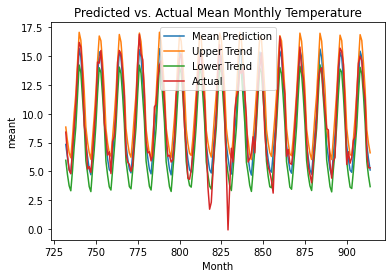

In [30]:
import matplotlib.pyplot as plt

predictons, =plt.plot(yhat, label='Mean Prediction')
upper, =plt.plot(yhat_upper, label='Upper Trend')
lower, =plt.plot(yhat_lower, label='Lower Trend')
actual, =plt.plot(test, label='Actual')
plt.xlabel('Month')
plt.ylabel('meant')
plt.title("Predicted vs. Actual Mean Monthly Temperature")
plt.legend(loc = 'upper center')
plt.show()

In [31]:
np.mean(test)

9.559562841530056